# Flight Route Analysis using Geoplotlib

Team:
- Nikhit Soares
- Poonam Patil
- Sheetal Kalburgi
- Swati Kohli

### This is in an addition to Geoplotlib repo: https://github.com/sheetalkalburgi/geoplotlib-geospatial-visualization

Here we will use 'flightsgeo.csv'

##  Feature 4: Convex Hull

A convex hull is the smallest convex polygon that contains all the points. Convex hulls can be used for example to visualize the approximate area corresponding to a set of points. 

In [32]:
# First let us read the file
flight = pd.read_csv("flightsgeo.csv")
flight.head()

lon_departure  lat_departure  lon_arrival  lat_arrival
0         61.838         55.509       38.510       55.681
1         61.838         55.509       49.464       56.010
2         61.838         55.509       83.084       55.021
3         38.510         55.681       61.838       55.509
4         38.510         55.681       20.987       55.483

In [33]:
# Select necessary columns
flight_convexhull = flight[['lat_departure','lon_departure']]
flight_convexhull.columns = ['lat','lon']
flight_convexhull.head()

lat     lon
0  55.509  61.838
1  55.509  61.838
2  55.509  61.838
3  55.681  38.510
4  55.681  38.510

Define some regions to implement Convex Hull. 
The procedure the obtain longitude and latitudes are the same how we did when defining a BoundingBox.
Another way to define different regions is to filter the data based on a certain criteria for example,
in a dataset which has the names for different cities, these regions has be defined by the names of each city.

In [34]:
# Let's define four regions

region1 = flight_convexhull[((flight_convexhull['lat'] > -8.8 ) & (flight_convexhull['lat'] < 82.1)) &
                           ((flight_convexhull['lon'] > 46.1 ) & (flight_convexhull['lon'] < 191.6))]

region2 = flight_convexhull[((flight_convexhull['lat'] > 36.9 ) & (flight_convexhull['lat'] < 72.7)) &
                           ((flight_convexhull['lon'] > -24.3 ) & (flight_convexhull['lon'] < 40.8))]


region3 = flight_convexhull[((flight_convexhull['lat'] > -76.7 ) & (flight_convexhull['lat'] < 13.9)) &
                           ((flight_convexhull['lon'] > -107.9 ) & (flight_convexhull['lon'] < -33.4))]

region4 = flight_convexhull[((flight_convexhull['lat'] > 13.6 ) & (flight_convexhull['lat'] < 73.2)) &
                           ((flight_convexhull['lon'] > -177.5) & (flight_convexhull['lon'] < -29.5))]


In [35]:
# save the new file
flight.to_csv('flightsgeo_DAO.csv')

In [36]:
# read the file as a DAO
flight = read_csv("flightsgeo_DAO.csv")

In [37]:
# Feature4: Convex Hull
geoplotlib.convexhull(region1, col='b', fill = False)
geoplotlib.convexhull(region2, col='g', fill = False)
geoplotlib.convexhull(region3, col='g', fill = False)
geoplotlib.convexhull(region4, col='b', fill = False)

geoplotlib.show()

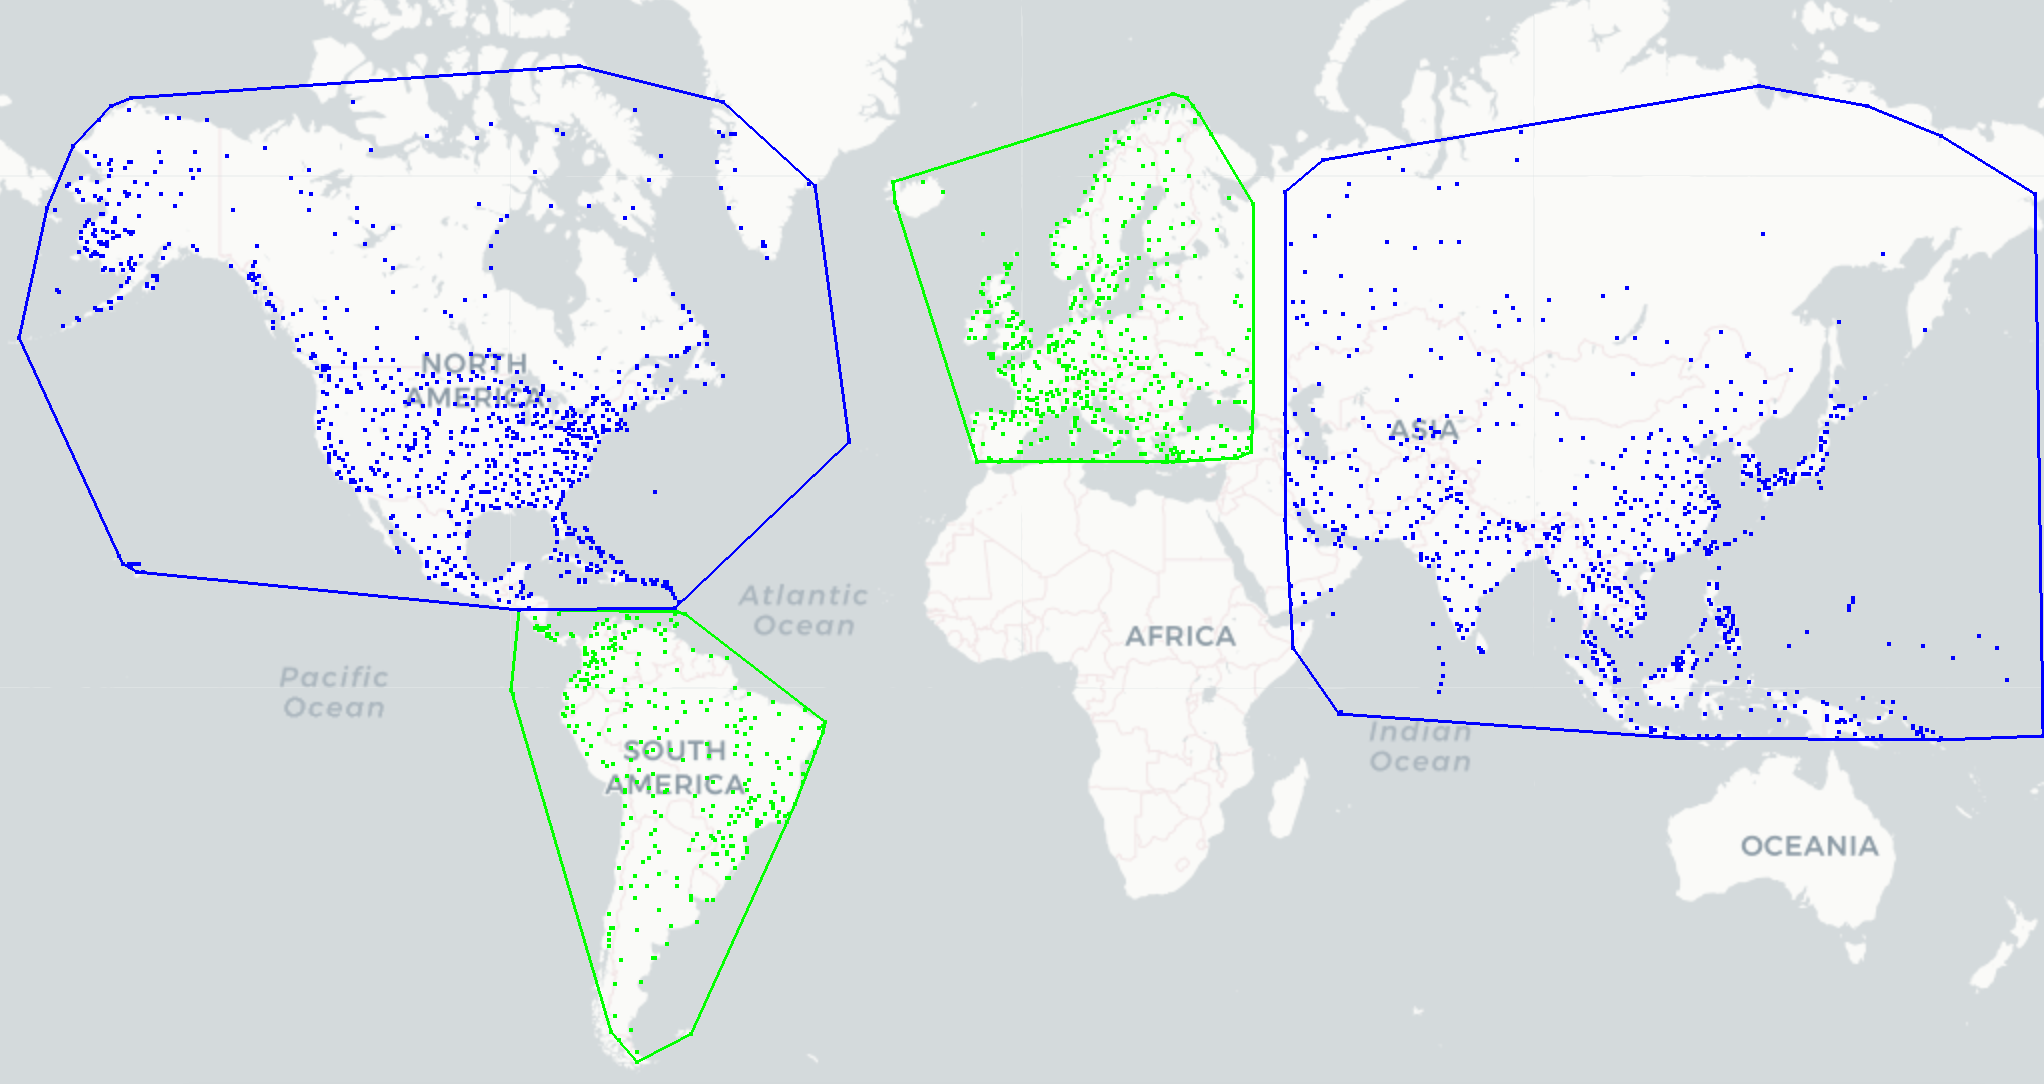

In [38]:
Image("convexhull.png", width=800, height=450)

**Interpretation:** 

The flight's departure airports are split into 4 groups, and each group is represented by a differently colored convex hull. Amongst the four regions, Region1, followed by Region2 seems to have the most number of airports from where flights depart.

### Feature 5: Spatial Graph

Spatial graphs are a special type of graphs where nodes have a well-defined spatial configuration. To implement Spatial Graphs, it is essential to have both the source as well as the destination longitudes.

In [39]:
# Feature5: Spatial Graph
data = read_csv('flightsgeo.csv') 
geoplotlib.graph( data, 
                 src_lat= 'lat_departure', src_lon ='lon_departure', 
                 dest_lat= 'lat_arrival', dest_lon = 'lon_arrival', 
                 color ='jet', alpha = 16, linewidth=2) # alpha indicates the colour transparency level
geoplotlib.show()

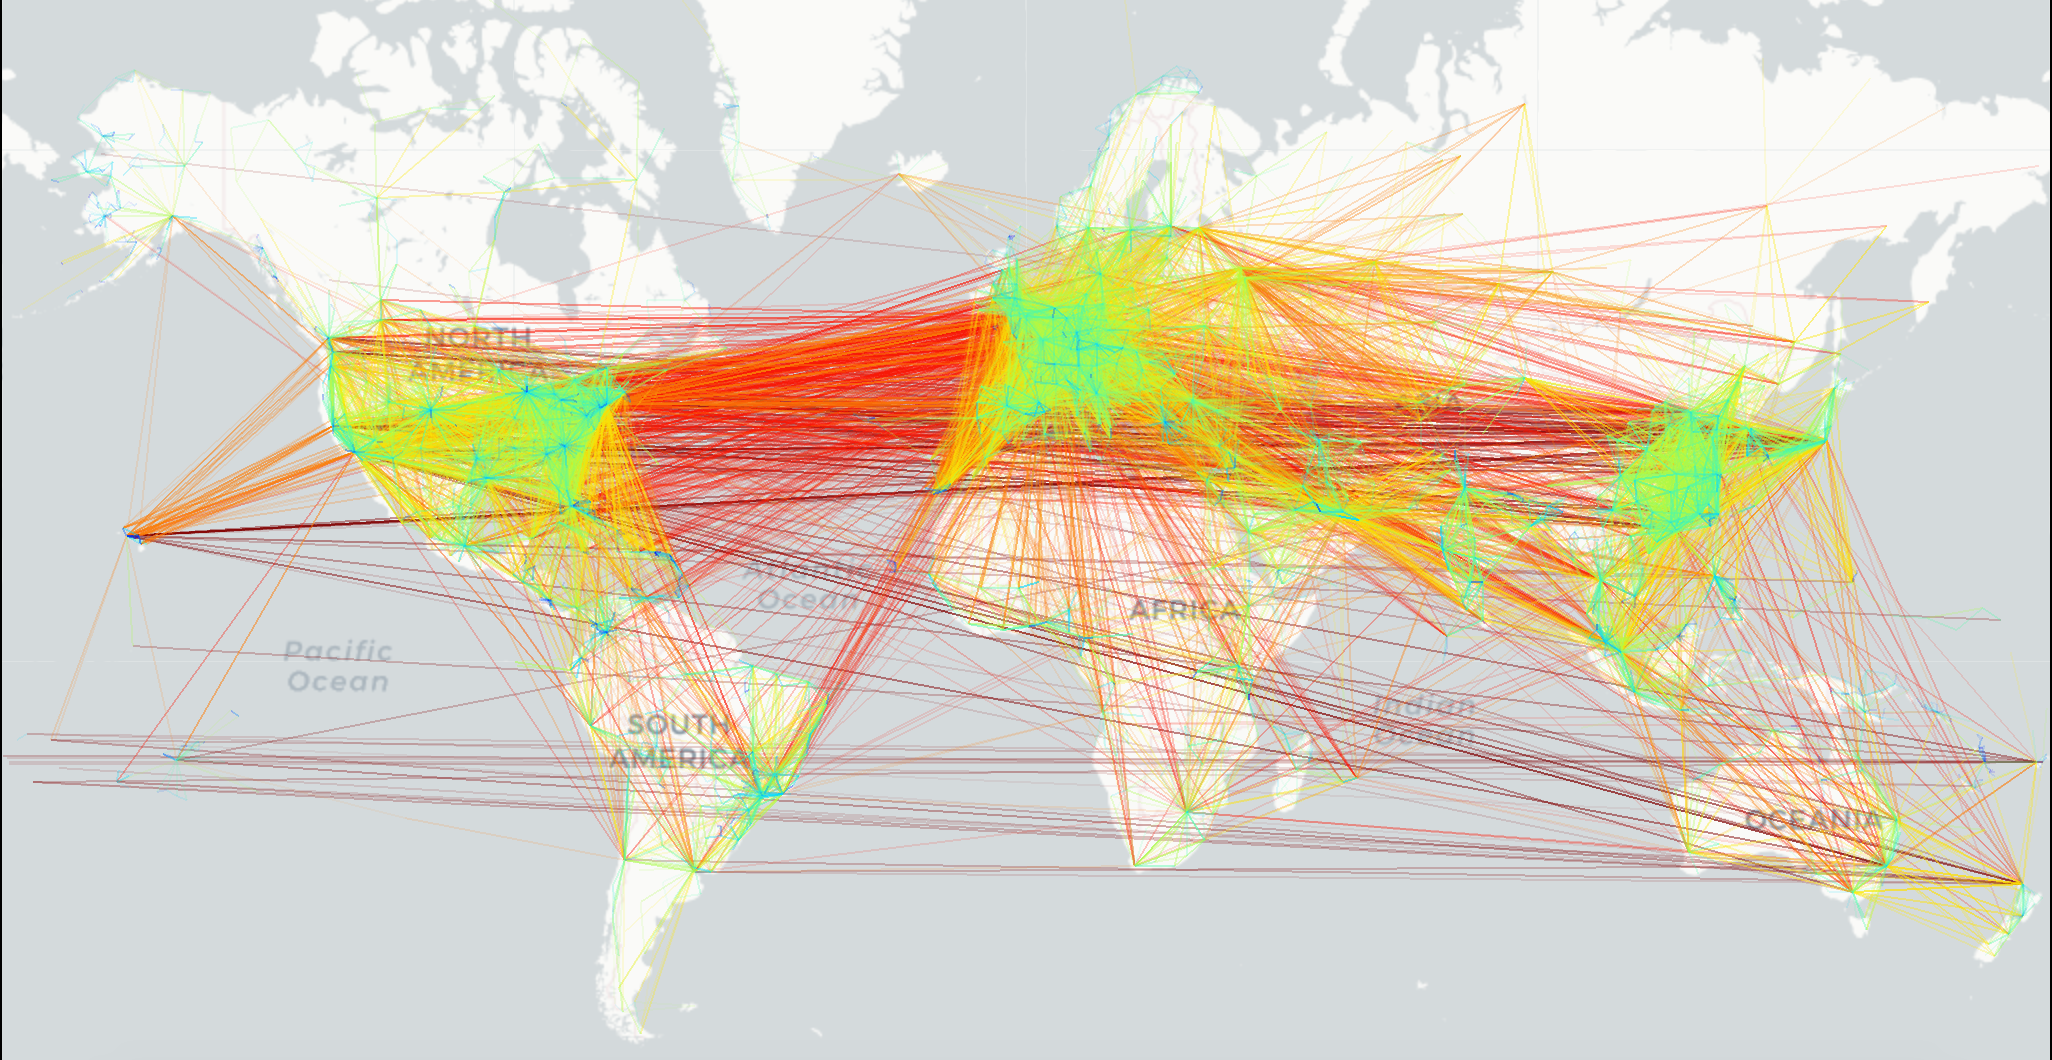

In [40]:
Image("spatialgraph.png", width=800, height=450)

**Interpretation:**

Shows the resulting spatial graph of airport locations, where each node represents an airport and each edge represents a flight connection. Edges are colored using a colormap encoding the edge length.

For example, in USA, Chicago and New York seem to have maximum number of flights departing and arriving.

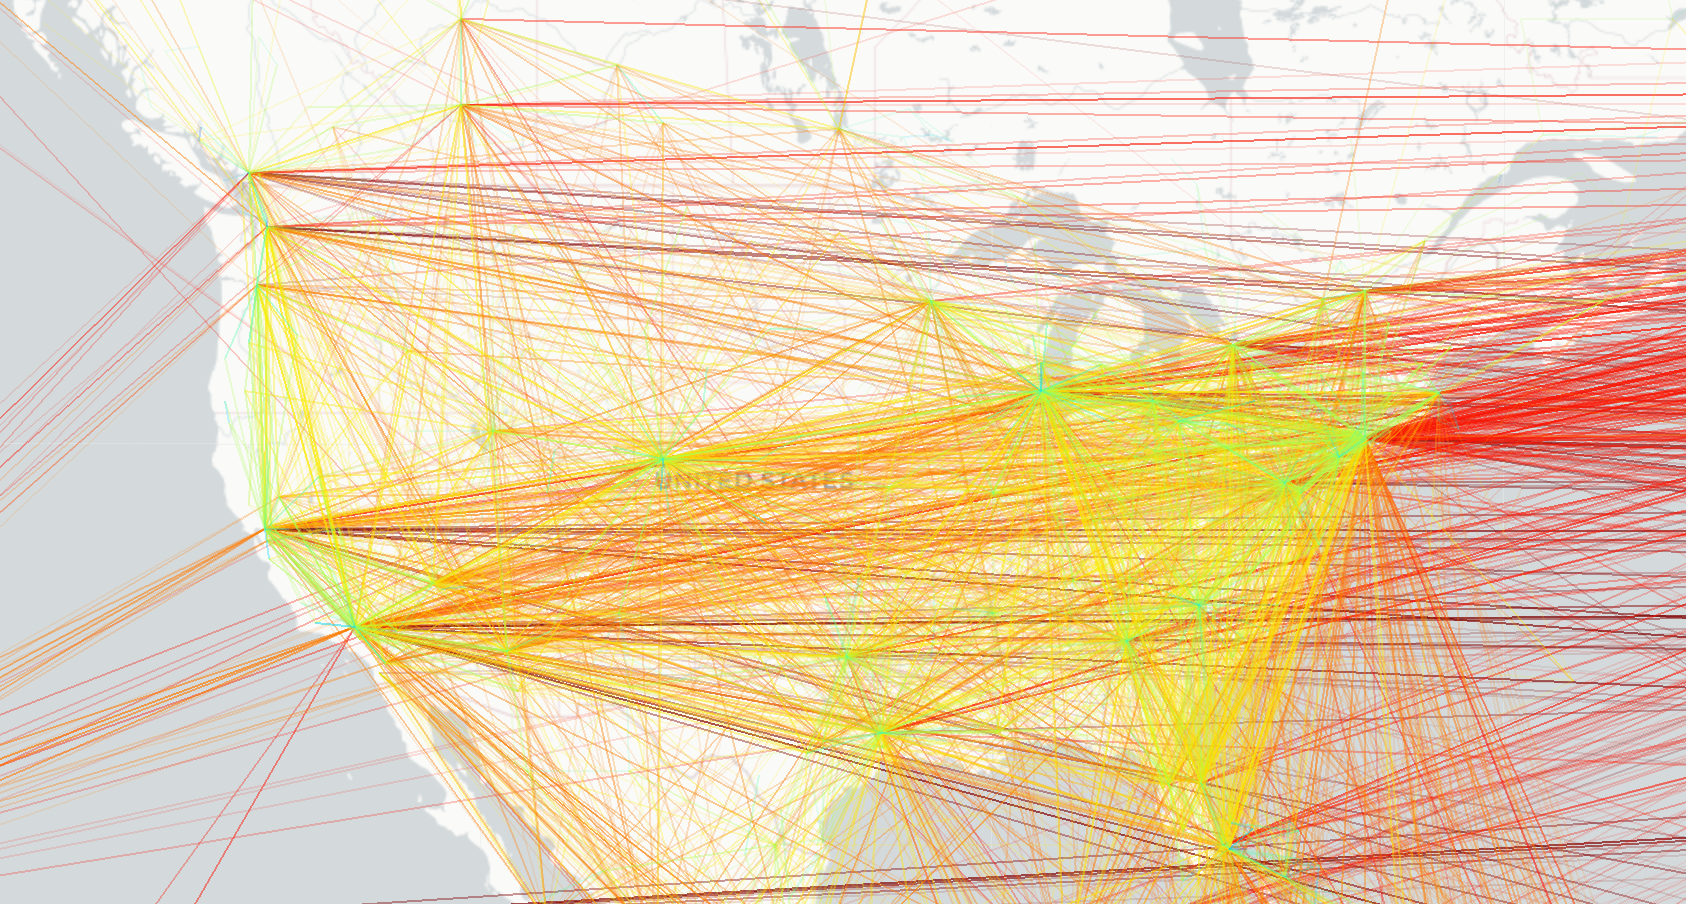

In [41]:
Image("spatialgraph_usa.png", width=800, height=450)

### Comparison and Similarity 

#### Differences

The matplotlib library has become the de-facto standard for data visualization in python and provides a large array of visualization tools including scatter and line plots, surface views, 3D plots, barcharts, and boxplots, but it does not provide any support for visualization on a geographical map by default.

The Basemap and Cartopy packages PySAL is an open-source library. These libraries however do not allow a user to draw on map tiles, and have limited support for custom visualizations, interactivity,and animation. The Basemap is powerful but at the cost of being too cumbersome by having a ton of dependencies if we want to get our desired map.

GeoPandas is a fantastic library that makes munging geographic data in Python easy.In fact, it is actually built on top of pandas, with data structures like “GeoSeries” and “GeoDataFrame” that extend the equivalent pandas data structures with useful geographic data crunching features. So, you get all the goodness of pandas, with geographic capabilities baked in.

Folium library is a leaflet.js library which allows to generate html maps without writing a single javascript code. Overall, Folium strikes a great balance between features, customizability, and ease of programming.

Most of these libraries and other geo-plotting available libraries have a lot of dependencies and can give a hard time installing through our python kernel. Many a times you have to restart the kernel and start over again to download these libraries again which demands more computation power as well.

#### Similarities

The geo-plotlib API is inspired by the matplotlib programming model and
syntax, the de-facto standard for data visualization in python; this makes
it easier for matplotlib users to get started.

The visualization canvas is initially empty, and each command adds a
new layer of graphics. The geoplotlib window is displayed when show() is called.
Alternatively, the map can be rendered to image file using savefig('filename'),
or displayed inline in an IPython notebook using inline().

The biggest advantage of geoplotlib is that it is easy to download library with too less dependencies and easy to use and generate customizable maps. Having less dependencies makes the computation speed faster as well. 

#### Lastly

Additionally, there are more advanced features available in geoplotlib such as:
   1. Animation with time stamp: animation feature work ONLY on time stamp data
   2. Choropleth: each geographic unit is coloured to show a continuous variable
   3. Custom layering: enables you to create and add custom layers 

#### References:
- http://www.marknagelberg.com/overview-python-and-non-python-mapping-tools-for-data-scientists/
- https://www.researchgate.net/publication/305983877_Geoplotlib_a_Python_Toolbox_for_Visualizing_Geographical_Data
- https://github.com/andrea-cuttone/geoplotlib
- https://github.com/AntoineSueur/Geoplot-landslides
-  https://nbviewer.jupyter.org/github/amrrs/mapping_wifi_wigle_r_py/blob/master/Building%20Wifi%20Spots%20Map%20with%20Python%20and%20WiGLE.ipynb